<a href="https://colab.research.google.com/github/fayadmehamood/auto/blob/main/lab2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
Given an image dataset organized into two folders: Cars and Bikes.
### Task

#### A. Data Preprocessing

1. Verify the folder structure and load all RGB images.
2. Preprocess the images by resizing them to a fixed size, normalizing pixel values, and converting them into one-dimensional feature vectors.
3. Assign class labels, shuffle the dataset, and split it into training and testing sets.

#### B. Implementation of Neural Network for the Above Classification Problem

4. Implement a neural network using gradient descent, train it for a fixed number of iterations while recording the cost, and evaluate the model by computing training and testing accuracy.
5. Plot the cost curve and report the final accuracy.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset folders: ['cars', 'bike']
Found 785 files belonging to 2 classes.
Using 628 files for training.
Found 785 files belonging to 2 classes.
Using 157 files for validation.
Class names: ['bike', 'cars']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 591ms/step - accuracy: 0.5320 - loss: 0.8811 - val_accuracy: 0.6943 - val_loss: 0.6565
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 425ms/step - accuracy: 0.6624 - loss: 0.6164 - val_accuracy: 0.7325 - val_loss: 0.5116
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 493ms/step - accuracy: 0.7691 - loss: 0.4847 - val_accuracy: 0.7834 - val_loss: 0.4786
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 468ms/step - accuracy: 0.8028 - loss: 0.4227 - val_accuracy: 0.7962 - val_loss: 0.4500
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.8035 - loss: 0.4163 - val_accuracy: 0.7962 - val_loss: 0.4920


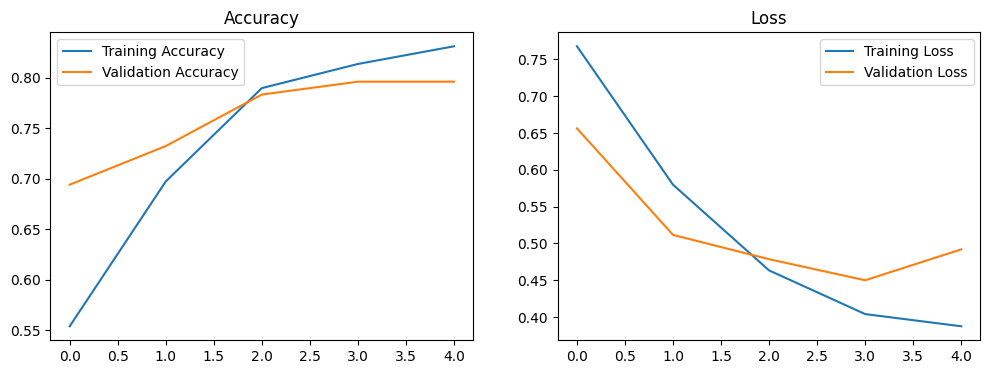

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.7433 - loss: 0.5695
Final Testing Accuracy: 79.62%


In [7]:

from google.colab import drive
drive.mount('/content/drive')


import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


DATASET_PATH = "/content/drive/MyDrive/transport dataset"

print("Dataset folders:", os.listdir(DATASET_PATH))


IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

print("Class names:", train_ds.class_names)


normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

loss, acc = model.evaluate(val_ds)
print(f"Final Testing Accuracy: {acc*100:.2f}%")
